In [1]:
import xlrd
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
corona_dataset_csv = pd.read_csv("Dataset/time_series_covid19_confirmed_global.csv")

In [3]:
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661


In [4]:
corona_dataset_csv.shape

(275, 489)

In [5]:
df = corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [6]:
corona_dataset_csv.shape

(275, 487)

In [7]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [8]:
corona_dataset_aggregated.shape

(192, 485)

In [9]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575
Albania,0,0,0,0,0,0,0,0,0,0,...,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118
Algeria,0,0,0,0,0,0,0,0,0,0,...,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156
Andorra,0,0,0,0,0,0,0,0,0,0,...,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569
Angola,0,0,0,0,0,0,0,0,0,0,...,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661


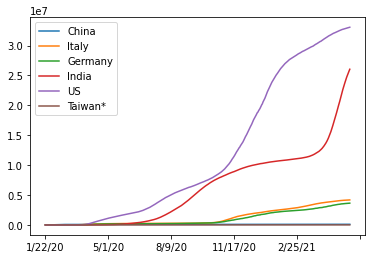

In [10]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Germany"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["US"].plot()
corona_dataset_aggregated.loc["Taiwan*"].plot()
plt.legend()

<AxesSubplot:>

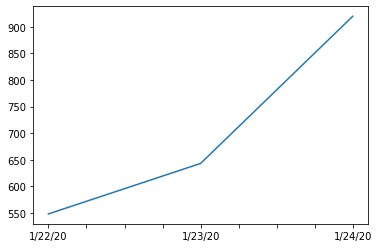

In [11]:
corona_dataset_aggregated.loc["China"][:3].plot()

<AxesSubplot:>

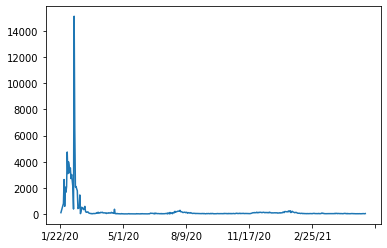

In [12]:
corona_dataset_aggregated.loc["China"].diff().plot()

In [13]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [14]:
corona_dataset_aggregated.loc["Germany"].diff().max()

49044.0

In [15]:
corona_dataset_aggregated.loc["India"].diff().max()

414188.0

In [16]:
corona_dataset_aggregated.loc["Afghanistan"].diff().max()

1485.0

In [17]:
corona_dataset_aggregated.loc["Afghanistan"].diff().max()

1485.0

In [18]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [19]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,62718,63045,63355,63412,63484,63598,63819,64122,64575,1485.0
Albania,0,0,0,0,0,0,0,0,0,0,...,131845,131890,131939,131978,132015,132032,132071,132095,132118,1239.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,124682,124889,125059,125194,125311,125485,125693,125896,126156,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,13470,13470,13510,13510,13510,13555,13569,13569,13569,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,29405,29695,30030,30354,30637,30787,31045,31438,31661,393.0


In [20]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [21]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,1485.0
Albania,1239.0
Algeria,1133.0
Andorra,299.0
Angola,393.0


In [22]:
read_file = pd.read_excel("Dataset/DataForFigure2.1WHR2021C2.xls")
read_file.to_csv("Dataset/DataForFigure2.1WHR2021C2.csv",index = None, header = True)

In [23]:
happiness_report_csv = pd.DataFrame(pd.read_csv("Dataset/DataForFigure2.1WHR2021C2.csv"))
happiness_report_csv.head()

,Country name,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.446356,1.106192,0.740824,0.690577
1,Denmark,1.501548,1.108008,0.762862,0.686160
2,Switzerland,1.565899,1.079469,0.816415,0.653488
3,Iceland,1.482190,1.172279,0.772319,0.697701
4,Netherlands,1.501072,1.079151,0.753425,0.646585


In [24]:
happiness_report_csv = happiness_report_csv.round(3)

In [25]:
happiness_report_csv.head()

,Country name,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.446,1.106,0.741,0.691
1,Denmark,1.502,1.108,0.763,0.686
2,Switzerland,1.566,1.079,0.816,0.653
3,Iceland,1.482,1.172,0.772,0.698
4,Netherlands,1.501,1.079,0.753,0.647


In [26]:
read_file = pd.read_csv("Dataset/2019 (1).csv")
read_file.to_excel("Dataset/2019 (1).xlsx",index = None, header = True)

In [27]:
happiness_report_csv.set_index("Country name", inplace = True)

In [28]:
happiness_report_csv.head()

,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,1.446,1.106,0.741,0.691
Denmark,1.502,1.108,0.763,0.686
Switzerland,1.566,1.079,0.816,0.653
Iceland,1.482,1.172,0.772,0.698
Netherlands,1.501,1.079,0.753,0.647


In [29]:
corona_data

,max_infection_rate
Country/Region,
Afghanistan,1485.0
Albania,1239.0
Algeria,1133.0
Andorra,299.0
Angola,393.0
...,...
Vietnam,296.0
West Bank and Gaza,2884.0
Yemen,174.0


In [30]:
corona_data.shape

(192, 1)

In [31]:
happiness_report_csv.head()

,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,1.446,1.106,0.741,0.691
Denmark,1.502,1.108,0.763,0.686
Switzerland,1.566,1.079,0.816,0.653
Iceland,1.482,1.172,0.772,0.698
Netherlands,1.501,1.079,0.753,0.647


In [32]:
happiness_report_csv.shape

(149, 4)

In [33]:
data = corona_data.join(happiness_report_csv,how = "inner")

## ?

In [34]:
corr = stats.pearsonr(data["max_infection_rate"],data["Log GDP per capita"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.22546443386457157
cor:		 0.10384831364537561


In [35]:
data.head()

,max_infection_rate,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,1485.0,0.370,0.000,0.126,0.000
Albania,1239.0,1.008,0.529,0.646,0.491
Algeria,1133.0,0.946,0.765,0.552,0.119
Argentina,39652.0,1.162,0.980,0.646,0.544
Armenia,2476.0,0.996,0.758,0.585,0.540


In [36]:
data.corr()

,max_infection_rate,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.103848,0.002500,0.075518,-0.091086
Log GDP per capita,0.103848,1.000000,0.798275,0.872102,0.456543
Social support,0.002500,0.798275,1.000000,0.748788,0.486441
Healthy life expectancy,0.075518,0.872102,0.748788,1.000000,0.493899
Freedom to make life choices,-0.091086,0.456543,0.486441,0.493899,1.000000


<AxesSubplot:xlabel='Log GDP per capita', ylabel='max_infection_rate'>

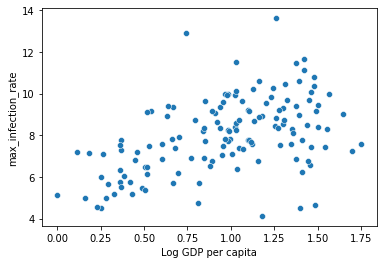

In [37]:
x = data["Log GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Log GDP per capita', ylabel='max_infection_rate'>

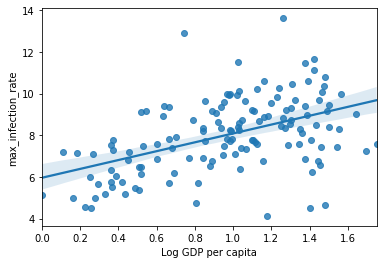

In [38]:
sns.regplot(x,np.log(y))

In [39]:
corona_death_dataset_csv = pd.read_csv("Dataset/time_series_covid19_deaths_global.csv")

In [40]:
corona_death_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2742,2745,2751,2762,2772,2782,2792,2802,2812,2836
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2432,2435,2436,2438,2440,2441,2442,2444,2445,2447
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3374,3381,3388,3395,3401,3405,3411,3418,3426,3433
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,659,677,685,696,704,709,715,725,731,735


In [41]:
corona_death_dataset_csv.shape

(275, 494)

In [42]:
df = corona_death_dataset_csv.drop(["Lat","Long"], axis = 1, inplace = True)

In [43]:
corona_death_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,2742,2745,2751,2762,2772,2782,2792,2802,2812,2836
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2432,2435,2436,2438,2440,2441,2442,2444,2445,2447
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,3374,3381,3388,3395,3401,3405,3411,3418,3426,3433
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,0,0,0,0,0,0,0,0,...,659,677,685,696,704,709,715,725,731,735


In [44]:
corona_death_dataset_aggregated = corona_death_dataset_csv.groupby("Country/Region").sum()

In [45]:
corona_death = corona_death_dataset_aggregated

In [46]:
corona_death.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2742,2745,2751,2762,2772,2782,2792,2802,2812,2836
Albania,0,0,0,0,0,0,0,0,0,0,...,2432,2435,2436,2438,2440,2441,2442,2444,2445,2447
Algeria,0,0,0,0,0,0,0,0,0,0,...,3374,3381,3388,3395,3401,3405,3411,3418,3426,3433
Andorra,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
Angola,0,0,0,0,0,0,0,0,0,0,...,659,677,685,696,704,709,715,725,731,735


In [47]:
corona_death.shape

(192, 490)

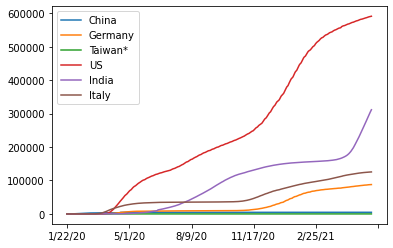

In [48]:
corona_death.loc["China"].plot()
corona_death.loc["Germany"].plot()
corona_death.loc["Taiwan*"].plot()
corona_death.loc["US"].plot()
corona_death.loc["India"].plot()
corona_death.loc["Italy"].plot()
plt.legend()

In [49]:
covid19_death = pd.DataFrame(corona_death["5/25/21"])

In [50]:
covid19_death.head()

,5/25/21
Country/Region,
Afghanistan,2836
Albania,2447
Algeria,3433
Andorra,127
Angola,735


In [51]:
covid19_death.loc["China"]

5/25/21    4846
Name: China, dtype: int64

In [52]:
covid19_death.loc["US"]

5/25/21    590941
Name: US, dtype: int64

In [53]:
covid19_death.rename(columns = {"5/25/21":"death_in_total_5/25/21"},inplace = True)

In [54]:
covid19_death.head()

,death_in_total_5/25/21
Country/Region,
Afghanistan,2836
Albania,2447
Algeria,3433
Andorra,127
Angola,735


In [55]:
data2 = covid19_death.join(happiness_report_csv,how = "inner")

In [56]:
data2.head()

,death_in_total_5/25/21,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,2836,0.370,0.000,0.126,0.000
Albania,2447,1.008,0.529,0.646,0.491
Algeria,3433,0.946,0.765,0.552,0.119
Argentina,75056,1.162,0.980,0.646,0.544
Armenia,4400,0.996,0.758,0.585,0.540


In [57]:
data2

,death_in_total_5/25/21,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,2836,0.370,0.000,0.126,0.000
Albania,2447,1.008,0.529,0.646,0.491
Algeria,3433,0.946,0.765,0.552,0.119
Argentina,75056,1.162,0.980,0.646,0.544
Armenia,4400,0.996,0.758,0.585,0.540
...,...,...,...,...,...
Venezuela,2544,0.852,0.897,0.574,0.284
Vietnam,44,0.817,0.873,0.616,0.679
Yemen,1311,0.329,0.831,0.272,0.268
Zambia,1271,0.528,0.552,0.231,0.487


In [58]:
corr = stats.pearsonr(data2["death_in_total_5/25/21"],data2["Log GDP per capita"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.09852553041725232
cor:		 0.1412101800920428


<AxesSubplot:xlabel='Log GDP per capita', ylabel='death_in_total_5/25/21'>

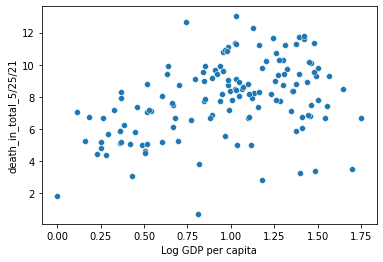

In [59]:
x = data2["Log GDP per capita"]
y = data2["death_in_total_5/25/21"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Log GDP per capita', ylabel='death_in_total_5/25/21'>

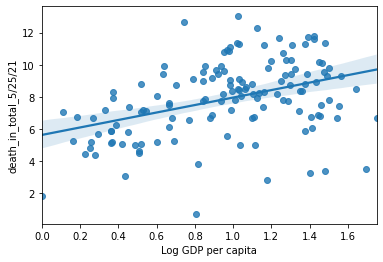

In [60]:
sns.regplot(x,np.log(y))